<a href="https://colab.research.google.com/github/ArSfllah/MANOVA-Statistika-Multivariat/blob/main/Jenis_Bacaan_dan_Kaitannya_dengan_Aspek_Emosi_dan_Nalar_Studi_Terhadap_Mahasiswa_Perguruan_Tinggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|         Nama Mahasiswa          |      NIM       | Kelas |
| --------------------------------| ---------------| ------|
| Baharuddiin Saefullah Asyubanji | 11220940000001 |   6B  |


# **Jenis Bacaan dan Kaitannya dengan Aspek Emosi dan Nalar: Studi Terhadap Mahasiswa Perguruan Tinggi**

## Import Modul

In [167]:
!pip install statsmodels
!pip install pingouin


from statsmodels.multivariate.manova import MANOVA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import statsmodels.api as sm

## Generate Data

In [168]:
# Set seed for reproducibility
np.random.seed(42)

# Simulasi jumlah responden
n = 200  # total responden

# Jenis bacaan: 4 kategori
book_types = ['Fiksi', 'Nonfiksi', 'Biografi', 'Pengembangan Diri']
book_choices = np.random.choice(book_types, size=n, p=[0.3, 0.3, 0.2, 0.2])

# Simulasi skor kecerdasan emosional (range 50–100)
emotional_intelligence = []
critical_thinking = []

for bt in book_choices:
    if bt == 'Fiksi':
        emotional_intelligence.append(np.random.normal(83, 5))
        critical_thinking.append(np.random.normal(75, 6))
    elif bt == 'Nonfiksi':
        emotional_intelligence.append(np.random.normal(78, 6))
        critical_thinking.append(np.random.normal(85, 5))
    elif bt == 'Biografi':
        emotional_intelligence.append(np.random.normal(80, 5))
        critical_thinking.append(np.random.normal(80, 5))
    elif bt == 'Pengembangan Diri':
        emotional_intelligence.append(np.random.normal(82, 6))
        critical_thinking.append(np.random.normal(78, 6))

# Membuat DataFrame
df = pd.DataFrame({
    'Jenis Bacaan': book_choices,
    'Kecerdasan Emosional': np.clip(emotional_intelligence, 50, 100),
    'Berpikir Kritis': np.clip(critical_thinking, 50, 100)
})

#Membulatkan dan pastikan skor 1–100
for col in ["Kecerdasan Emosional", "Berpikir Kritis"]:
    df[col] = df[col].clip(1, 100).round().astype(int)

# Simpan ke CSV
df.to_csv('Data Jenis Bacaan.csv', index=False)

In [169]:
df

,Jenis Bacaan,Kecerdasan Emosional,Berpikir Kritis
0,Nonfiksi,74,86
1,Pengembangan Diri,84,74
2,Biografi,89,82
3,Nonfiksi,71,88
4,Fiksi,78,80
...,...,...,...
195,Nonfiksi,81,92
196,Biografi,68,76
197,Pengembangan Diri,85,77
198,Pengembangan Diri,84,74


## Uji Normalitas Multivariat

### Uji Normalitas Multivariat Data

In [170]:
data_Fiksi = df.loc[df['Jenis Bacaan']=='Fiksi', ['Kecerdasan Emosional', 'Berpikir Kritis']]
data_Nonfiksi = df.loc[df['Jenis Bacaan']=='Nonfiksi', ['Kecerdasan Emosional', 'Berpikir Kritis']]
data_Biografi = df.loc[df['Jenis Bacaan']=='Biografi', ['Kecerdasan Emosional', 'Berpikir Kritis']]
data_Pengembangan = df.loc[df['Jenis Bacaan']=='Pengembangan Diri', ['Kecerdasan Emosional', 'Berpikir Kritis']]

In [171]:
print('uji normalitas multivariat Fiksi: ', pg.multivariate_normality(data_Fiksi, alpha=0.05))
print('uji normalitas multivariat Nonfiksi: ', pg.multivariate_normality(data_Nonfiksi, alpha=0.05))
print('uji normalitas multivariat Biografi: ', pg.multivariate_normality(data_Biografi, alpha=0.05))
print('uji normalitas multivariat Pengembangan Diri: ', pg.multivariate_normality(data_Pengembangan, alpha=0.05))

uji normalitas multivariat Fiksi:  HZResults(hz=np.float64(36.77560924331624), pval=np.float64(1.2342131087587245e-32), normal=False)
uji normalitas multivariat Nonfiksi:  HZResults(hz=np.float64(30.341133060334325), pval=np.float64(1.5757805745816194e-29), normal=False)
uji normalitas multivariat Biografi:  HZResults(hz=np.float64(17.986359035878415), pval=np.float64(2.0810019181506792e-22), normal=False)
uji normalitas multivariat Pengembangan Diri:  HZResults(hz=np.float64(21.606784436212926), pval=np.float64(1.0546922396713417e-24), normal=False)


### Interpretasi Uji Normalitas Multivariat

In [172]:
# List untuk menyimpan interpretasi
interpretasi = []

# Loop tiap kategori
for kategori in df['Jenis Bacaan'].unique():
    data_kat = df[df['Jenis Bacaan'] == kategori][['Kecerdasan Emosional', 'Berpikir Kritis']]

    print(f"🔍 Jenis Bacaan: {kategori}")
    if data_kat.shape[0] >= 3:
        hasil = pg.multivariate_normality(data_kat, alpha=0.05)
        pval = hasil.pval

        # Interpretasi otomatis
        if pval > 0.05:
            print(f"✅ Data berdistribusi normal multivariat karena p-value = {pval:.4f} > 0.05.\n")
        else:
            print(f"❌ Data TIDAK berdistribusi normal multivariat karena p-value = {pval:.4e} < 0.05.\n")

🔍 Jenis Bacaan: Nonfiksi
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 1.5758e-29 < 0.05.

🔍 Jenis Bacaan: Pengembangan Diri
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 1.0547e-24 < 0.05.

🔍 Jenis Bacaan: Biografi
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 2.0810e-22 < 0.05.

🔍 Jenis Bacaan: Fiksi
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 1.2342e-32 < 0.05.



### Transformasi Data

In [173]:
data_Fiksi_trans = np.log(data_Fiksi)
data_Nonfiksi_trans = np.log(data_Nonfiksi)
data_Biografi_trans = np.log(data_Biografi)
data_Pengembangan_trans = np.log(data_Pengembangan)

In [174]:
# Uji normalitas multivariat setelah transformasi
print('Uji normalitas multivariat - Fiksi (log):\n', pg.multivariate_normality(data_Fiksi_trans, alpha=0.05))
print('Uji normalitas multivariat - Nonfiksi (log):\n', pg.multivariate_normality(data_Nonfiksi_trans, alpha=0.05))
print('Uji normalitas multivariat - Bografi (log):\n', pg.multivariate_normality(data_Biografi_trans, alpha=0.05))
print('Uji normalitas multivariat - Pengembangan Diri (log):\n', pg.multivariate_normality(data_Pengembangan_trans, alpha=0.05))

Uji normalitas multivariat - Fiksi (log):
 HZResults(hz=np.float64(0.43317082348320535), pval=np.float64(0.6611147001722645), normal=True)
Uji normalitas multivariat - Nonfiksi (log):
 HZResults(hz=np.float64(0.37617819578358636), pval=np.float64(0.7584325815734967), normal=True)
Uji normalitas multivariat - Bografi (log):
 HZResults(hz=np.float64(0.3168825995628306), pval=np.float64(0.807067691461385), normal=True)
Uji normalitas multivariat - Pengembangan Diri (log):
 HZResults(hz=np.float64(0.404782975698342), pval=np.float64(0.627329016662011), normal=True)


### Interpretasi Uji Normalitas Multivariat Setelah Transformasi

In [175]:
# Interpretasi hasil uji normalitas multivariat setelah transformasi log
results = {
    'Fiksi': pg.multivariate_normality(data_Fiksi_trans, alpha=0.05),
    'Nonfiksi': pg.multivariate_normality(data_Nonfiksi_trans, alpha=0.05),
    'Biografi': pg.multivariate_normality(data_Biografi_trans, alpha=0.05),
    'Pengembangan Diri': pg.multivariate_normality(data_Pengembangan_trans, alpha=0.05)
}

for kategori, hasil in results.items():
    p_value = hasil.pval
    if p_value > 0.05:
        print(f"✅ Data '{kategori}' sudah berdistribusi normal multivariat (p-value = {p_value:.4f} > 0.05)")
    else:
        print(f"❌ Data '{kategori}' belum berdistribusi normal multivariat (p-value = {p_value:.4f} ≤ 0.05)")

✅ Data 'Fiksi' sudah berdistribusi normal multivariat (p-value = 0.6611 > 0.05)
✅ Data 'Nonfiksi' sudah berdistribusi normal multivariat (p-value = 0.7584 > 0.05)
✅ Data 'Biografi' sudah berdistribusi normal multivariat (p-value = 0.8071 > 0.05)
✅ Data 'Pengembangan Diri' sudah berdistribusi normal multivariat (p-value = 0.6273 > 0.05)


## Uji Homogenitas

### Menggabungkan Kembali Data yang Telah ditransformasi

In [176]:
#Gabungkan Kembali data
data_trans_manova = pd.concat([data_Fiksi_trans, data_Nonfiksi_trans, data_Biografi_trans, data_Pengambangan_trans])
data_trans_manova['Jenis Bacaan'] = df['Jenis Bacaan'].copy()
data_trans_manova

,Kecerdasan Emosional,Berpikir Kritis,Jenis Bacaan
4,4.356709,4.382027,Fiksi
5,4.488636,4.248495,Fiksi
6,4.477337,4.343805,Fiksi
10,4.418841,4.343805,Fiksi
13,4.406719,4.510860,Fiksi
...,...,...,...
186,4.343805,4.204693,Pengembangan Diri
191,4.356709,4.356709,Pengembangan Diri
192,4.343805,4.330733,Pengembangan Diri
197,4.442651,4.343805,Pengembangan Diri


### Lakukan Uji Homogenitas

In [177]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Kecerdasan Emosional', 'Berpikir Kritis' ], group='Jenis Bacaan' )

,Chi2,df,pval,equal_cov
box,24.649511,9.0,0.003384,True


In [178]:
# Uji Homogenitas dengan Box's M Test
hasil_boxm = pg.box_m(data_trans_manova, dvs=['Kecerdasan Emosional', 'Berpikir Kritis'], group='Jenis Bacaan')

# Tampilkan hasil
print(hasil_boxm)

# Interpretasi hasil uji homogenitas
p_value = hasil_boxm['pval'].values[0]
if p_value > 0.05:
    print(f"\n✅ Data memenuhi asumsi homogenitas (p-value = {p_value:.4f} > 0.05)")
else:
    print(f"\n❌ Data tidak memenuhi asumsi homogenitas (p-value = {p_value:.4f} ≤ 0.05)")

          Chi2   df      pval  equal_cov
box  24.649511  9.0  0.003384       True

❌ Data tidak memenuhi asumsi homogenitas (p-value = 0.0034 ≤ 0.05)


## MANOVA

In [179]:
# Pastikan nama kolom tidak ada spasi
data_trans_manova_rename = data_trans_manova.rename(columns={
    'Kecerdasan Emosional': 'Kecerdasan_Emosional',
    'Berpikir Kritis': 'Berpikir_Kritis',
    'Jenis Bacaan': 'Jenis_Bacaan'
})

# Jalankan MANOVA dengan formula
manova = MANOVA.from_formula('Kecerdasan_Emosional + Berpikir_Kritis ~ Jenis_Bacaan', data=data_trans_manova_rename)
print(manova.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0007 2.0000 195.0000 143727.2454 0.0000
         Pillai's trace    0.9993 2.0000 195.0000 143727.2454 0.0000
 Hotelling-Lawley trace 1474.1256 2.0000 195.0000 143727.2454 0.0000
    Roy's greatest root 1474.1256 2.0000 195.0000 143727.2454 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
         Jenis_Bacaan       Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wilks' lambda  0.5897  6.0000  390.0000 

Karena Asumsi Homegenitas stiadak terpenuhi maka, kita lakukan pengujian manova dengan

## Uji Post Hoc

Disini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar ke-3nya

In [180]:
# Corrected typo in the dv argument
tukey_Kecerdasan = pg.pairwise_tukey(data=data_trans_manova_rename, dv='Kecerdasan_Emosional', between='Jenis_Bacaan')
print("Tukey Post-hoc untuk variabel Kecerdasan Emosional")
tukey_Kecerdasan

Tukey Post-hoc untuk variabel Kecerdasan Emosional


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Biografi,Fiksi,4.379155,4.416848,-0.037692,0.014790,-2.548435,0.055789,-0.635130
1,Biografi,Nonfiksi,4.379155,4.355763,0.023393,0.015249,1.534001,0.419197,0.322013
2,Biografi,Pengembangan Diri,4.379155,4.411966,-0.032810,0.016213,-2.023647,0.182821,-0.422338
3,Fiksi,Nonfiksi,4.416848,4.355763,0.061085,0.012969,4.709958,0.000028,0.897352
4,Fiksi,Pengembangan Diri,4.416848,4.411966,0.004882,0.014090,0.346491,0.985669,0.068444
5,Nonfiksi,Pengembangan Diri,4.355763,4.411966,-0.056203,0.014571,-3.857095,0.000890,-0.676715


In [181]:
# Corrected typo in the dv argument
tukey_Berpikir = pg.pairwise_tukey(data=data_trans_manova_rename, dv='Berpikir_Kritis', between='Jenis_Bacaan')
print("Tukey Post-hoc untuk variabel Kecerdasan Emosional")
tukey_Berpikir

Tukey Post-hoc untuk variabel Kecerdasan Emosional


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Biografi,Fiksi,4.377571,4.312713,0.064858,0.013867,4.677132,3.192954e-05,0.978920
1,Biografi,Nonfiksi,4.377571,4.437930,-0.060359,0.014297,-4.221676,2.158691e-04,-1.047748
2,Biografi,Pengembangan Diri,4.377571,4.356824,0.020747,0.015201,1.364807,5.229526e-01,0.305201
3,Fiksi,Nonfiksi,4.312713,4.437930,-0.125217,0.012160,-10.297732,4.662937e-14,-1.865880
4,Fiksi,Pengembangan Diri,4.312713,4.356824,-0.044111,0.013211,-3.339083,5.512928e-03,-0.589951
5,Nonfiksi,Pengembangan Diri,4.437930,4.356824,0.081106,0.013662,5.936753,7.784540e-08,1.181185


## Visualisasi Data

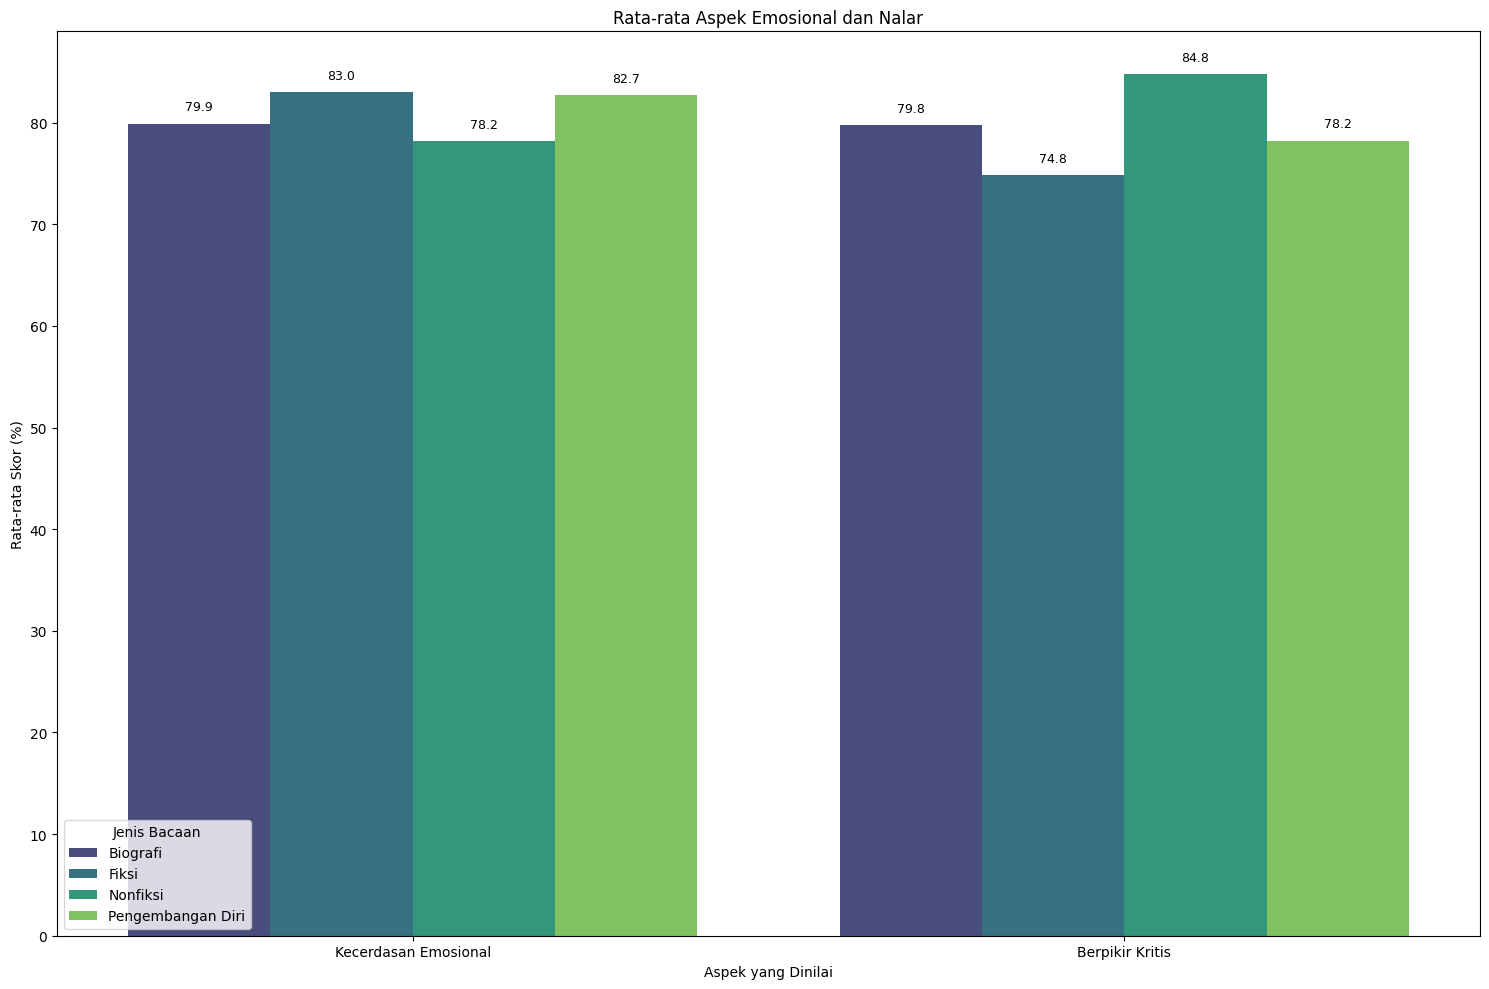

In [195]:
# Hitung rata-rata tiap merek dan variabel
group_means = df.groupby('Jenis Bacaan')[['Kecerdasan Emosional', 'Berpikir Kritis']].mean().reset_index()

# Ubah ke long format
df_melt = pd.melt(group_means, id_vars='Jenis Bacaan', var_name='Variabel', value_name='Rata-rata')

plt.figure(figsize=(15,10))

# Tukar posisi x dan hue
ax = sns.barplot(data=df_melt, x='Variabel', y='Rata-rata', hue='Jenis Bacaan', palette='viridis')

plt.title('Rata-rata Aspek Emosional dan Nalar')
plt.xlabel('Aspek yang Dinilai')
plt.ylabel('Rata-rata Skor (%)')

# Tambah nilai rata-rata di atas bar
for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.legend(title='Jenis Bacaan') # Update legend title
plt.tight_layout()
plt.show()

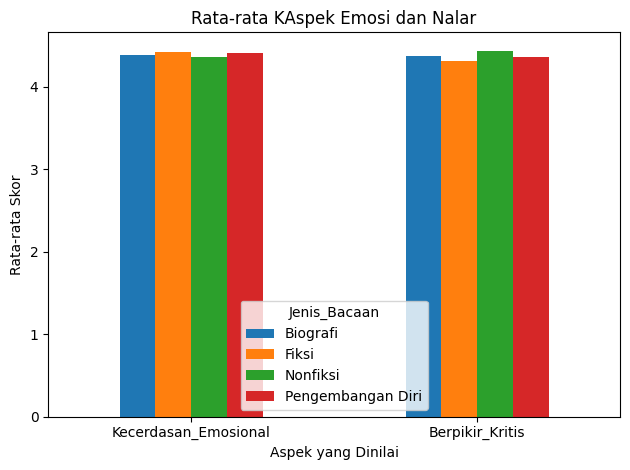

In [194]:
# The DataFrame containing the data after transformation and renaming is data_trans_manova_rename
# Use this DataFrame instead of the undefined 'data_manova'
data_trans_manova_rename.groupby('Jenis_Bacaan')[['Kecerdasan_Emosional', 'Berpikir_Kritis']].mean().T.plot(kind='bar')

# Correct the title to reflect the actual variables being plotted
plt.title('Rata-rata KAspek Emosi dan Nalar')
plt.xlabel('Aspek yang Dinilai') # Lebih deskriptif dari 'Rata-rata'
plt.ylabel('Rata-rata Skor') # Lebih deskriptif dari rotasi 0
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## INTERPRETASI